## 1. Searching for gold inside HTML files
<p>It used to take days for financial news to spread via radio, newspapers, and word of mouth. Now, in the age of the internet, it takes seconds. Did you know news articles are <em>automatically</em> being generated from figures and earnings call streams? Hedge funds and independent traders are using data science to process this wealth of information in the quest for profit.</p>
<p>In this notebook, we will generate investing insight by applying <a href="https://en.wikipedia.org/wiki/Sentiment_analysis">sentiment analysis</a> on financial news headlines from <a href="https://finviz.com">FINVIZ.com</a>. Using this <a href="https://en.wikipedia.org/wiki/Natural_language_processing">natural language processing</a> technique, we can understand the emotion behind the headlines and predict whether the market <em>feels</em> good or bad about a stock. It would then be possible to make educated guesses on how certain stocks will perform and trade accordingly. (And hopefully, make money!)</p>
<p><img src="https://assets.datacamp.com/production/project_611/img/fb_headlines.png" alt="Facebook headlines from FINVIZ.com"></p>
<p>Why headlines? And why from FINVIZ?</p>
<ol>
<li>Headlines, which have similar length, are easier to parse and group than full articles, which vary in length.</li>
<li>FINVIZ has a list of trusted websites, and headlines from these sites tend to be more consistent in their jargon than those from independent bloggers. Consistent textual patterns will improve the sentiment analysis.</li>
</ol>
<p>As <a href="https://en.wikipedia.org/wiki/Web_scraping">web scraping</a> requires data science ethics (sending a lot of traffic to a FINVIZ's servers isn't very nice), the HTML files for Facebook and Tesla at various points in time have been downloaded. Let's import these files into memory.</p>
<p><strong>Disclaimer: Investing in the stock market involves risk and can lead to monetary loss. The content in this notebook is not to be taken as financial advice.</strong> </p>

In [180]:
# Import libraries
from bs4 import BeautifulSoup
import pandas as pd
import os

html_tables = {}

# For every table in the datasets folder...
for table_path in os.listdir('datasets'):
    # Read the contents of the file into 'html'
    html = BeautifulSoup(open("datasets/"+table_path),'html.parser')
    # Find 'news-table' in the Soup and load it into 'html_table'
    html_table = html.find(id='news-table')
    # Add the table to our dictionary
    html_tables[table_path] = html_table

## 2. What is inside those files anyway?
<p>We've grabbed the table that contains the headlines from each stock's HTML file, but before we start parsing those tables further, we need to understand how the data in that table is structured. We have a few options for this:</p>
<ul>
<li>Open the HTML file with a text editor (preferably one with syntax highlighting, like <a href="http://www.sublimetext.com/">Sublime Text</a>) and explore it there</li>
<li>Use your browser's <a href="https://addons.mozilla.org/en-US/firefox/addon/web-developer/">webdev toolkit</a> to explore the HTML</li>
<li>Explore the headlines table here in this notebook!</li>
</ul>
<p>Let's do the third option.</p>

In [182]:
# Get all the rows in Tesla's headlines table
tsla = html_tables['tsla_22sep.html']
tsla_tr = tsla.findAll('tr')

# For each row in Tesla's headlines table
for i, table_row in enumerate(tsla_tr):
    # Read the text of the element 'a' into 'link_text'
    link_text = table_row.a.get_text()
    # Read the text of the element 'td' into 'data_text'
    data_text = table_row.td.get_text()
    # Print the count
    print(f'{...}:')
    # Print the text
    print(link_text)
    print(data_text)
    # Exit the loop after three rows
    if i == 3:
        break

Ellipsis:
Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets
Sep-21-18 09:56PM  
Ellipsis:
Broadcoms Stock Looks Like a Winner
09:30PM  
Ellipsis:
SHAREHOLDER ALERT:  Pomerantz Law Firm Reminds Shareholders with Losses on their Investment in Tesla, Inc. of Class Action Lawsuit and Upcoming Deadline  TSLA
05:30PM  
Ellipsis:
Tesla's People Problem and the Inscrutable Musk: 2 Things That Make You Go Hmmm
05:30PM  


## 3. Extra, extra! Extract the news headlines
<p>As we saw above, the interesting data inside each table row (<code>&lt;tr&gt;</code>) is in the text inside the <code>&lt;td&gt;</code> and <code>&lt;a&gt;</code> tags. Let's now actually parse the data for <strong>all</strong> tables in a comfortable data structure.</p>

In [184]:
# Hold the parsed news into a list
parsed_news = []
# Iterate through the news
for file_name, news_table in html_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # Read the text from the tr tag into text
        text = x.get_text() 
        # Split the text in the td tag into a list 
        date_scrape = x.td.text.split()
        # If the length of 'date_scrape' is 1, load 'time' as the only element
        # If not, load 'date' as the 1st element and 'time' as the second
        if len(date_scrape) == 1:
            time = date_scrape[0]
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = (file_name.split('_'))[0]
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, x.a.text])

In [185]:
parsed_news

[['tsla',
  'Sep-21-18',
  '09:56PM',
  "Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets"],
 ['tsla', 'Sep-21-18', '09:30PM', 'Broadcoms Stock Looks Like a Winner'],
 ['tsla',
  'Sep-21-18',
  '05:30PM',
  'SHAREHOLDER ALERT:\xa0 Pomerantz Law Firm Reminds Shareholders with Losses on their Investment in Tesla, Inc. of Class Action Lawsuit and Upcoming Deadline  TSLA'],
 ['tsla',
  'Sep-21-18',
  '05:30PM',
  "Tesla's People Problem and the Inscrutable Musk: 2 Things That Make You Go Hmmm"],
 ['tsla',
  'Sep-21-18',
  '05:03PM',
  'Tesla Model 3 Crash Test Rating 2018: It Earns Top NHTSA Safety Rating'],
 ['tsla',
  'Sep-21-18',
  '03:26PM',
  'Yet Another Tesla Exec Leaves Amid Festering Finance Questions'],
 ['tsla',
  'Sep-21-18',
  '03:18PM',
  '7 Activist Stocks for Investors to Consider'],
 ['tsla',
  'Sep-21-18',
  '03:12PM',
  'CLASS ACTION UPDATE for TSLA, PDD and SBGI: Levi & Korsinsky, LLP Reminds Investors of Class Actions on Behalf of Shareh

## 4. Make NLTK think like a financial journalist
<p>Sentiment analysis is very sensitive to context. As an example, saying <em>"This is so addictive!"</em> often means something positive if the context is a video game you are enjoying with your friends, but it very often means something negative when we are talking about opioids. Remember that the reason we chose headlines is so we can try to extract sentiment from financial journalists, who like most professionals, have their own lingo. Let's now make NLTK think like a financial journalist by adding some new words and sentiment values to our lexicon.</p>

In [187]:
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# New words and values
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}
# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()
# Update the lexicon
# ... YOUR CODE FOR TASK 4 ...
vader.lexicon.update(new_words)

## 5. BREAKING NEWS: NLTK Crushes Sentiment Estimates
<p>Now that we have the data and the algorithm loaded, we will get to the core of the matter: programmatically predicting sentiment out of news headlines! Luckily for us, VADER is very high level so, in this case, we will not adjust the model further<sup>*</sup> other than the lexicon additions from before.</p>
<p><sup>*</sup>VADER "out-of-the-box" with some extra lexicon would likely translate into <strong>heavy losses</strong> with real money. A real sentiment analysis tool with chances of being profitable will require a very extensive and dedicated to finance news lexicon. Furthermore, it might also not be enough using a pre-packaged model like VADER.</p>

In [189]:
# Use these column names
columns = ['ticker', 'date', 'time', 'headline']
# Convert the list of lists into a DataFrame
scored_news = pd.DataFrame(parsed_news,columns=columns)
# Iterate through the headlines and get the polarity scores
scores = list(scored_news['headline'].apply(vader.polarity_scores))
# Convert the list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)
# Join the DataFrames
scored_news = scored_news.join(scores_df)
# Convert the date column from string to datetime
scored_news['date'] = pd.to_datetime(scored_news.date).dt.date

In [190]:
scored_news

ticker        date     time  \
0     tsla  2018-09-21  09:56PM   
1     tsla  2018-09-21  09:30PM   
2     tsla  2018-09-21  05:30PM   
3     tsla  2018-09-21  05:30PM   
4     tsla  2018-09-21  05:03PM   
5     tsla  2018-09-21  03:26PM   
6     tsla  2018-09-21  03:18PM   
7     tsla  2018-09-21  03:12PM   
8     tsla  2018-09-21  01:53PM   
9     tsla  2018-09-21  01:06PM   
10    tsla  2018-09-21  11:03AM   
11    tsla  2018-09-21  10:00AM   
12    tsla  2018-09-21  09:59AM   
13    tsla  2018-09-21  09:57AM   
14    tsla  2018-09-21  09:50AM   
15    tsla  2018-09-21  09:23AM   
16    tsla  2018-09-21  08:09AM   
17    tsla  2018-09-21  07:32AM   
18    tsla  2018-09-21  06:15AM   
19    tsla  2018-09-21  04:25AM   
20    tsla  2018-09-20  11:49PM   
21    tsla  2018-09-20  08:12PM   
22    tsla  2018-09-20  07:44PM   
23    tsla  2018-09-20  07:37PM   
24    tsla  2018-09-20  07:27PM   
25    tsla  2018-09-20  07:23PM   
26    tsla  2018-09-20  06:21PM   
27    tsla  2018-09-20  06:21PM   
28    tsla  2018-09-20  05:45PM   
29    tsla  2018-09-20  05:28PM   
..     ...         ...      ...   
470   tsla  2018-11-19  09:30AM   
471   tsla  2018-11-19  08:56AM   
472   tsla  2018-11-19  08:33AM   
473   tsla  2018-11-19  06:55AM   
474   tsla  2018-11-18  11:05AM   
475   tsla  2018-11-18  10:00AM   
476   tsla  2018-11-18  08:18AM   
477   tsla  2018-11-17  01:19PM   
478   tsla  2018-11-17  06:00AM   
479   tsla  2018-11-16  06:50PM   
480   tsla  2018-11-16  04:27PM   
481   tsla  2018-11-16  04:20PM   
482   tsla  2018-11-16  02:46PM   
483   tsla  2018-11-16  02:12PM   
484   tsla  2018-11-16  02:00PM   
485   tsla  2018-11-16  12:14PM   
486   tsla  2018-11-16  11:59AM   
487   tsla  2018-11-16  10:19AM   
488   tsla  2018-11-16  10:13AM   
489   tsla  2018-11-16  09:52AM   
490   tsla  2018-11-16  09:20AM   
491   tsla  2018-11-16  09:04AM   
492   tsla  2018-11-16  08:56AM   
493   tsla  2018-11-16  08:35AM   
494   tsla  2018-11-16  08:32AM   
495   tsla  2018-11-16  08:31AM   
496   tsla  2018-11-16  08:12AM   
497   tsla  2018-11-16  06:39AM   
498   tsla  2018-11-16  06:00AM   
499   tsla  2018-11-16  05:00AM   

                                              headline  compound    neg  \
0    Billionaire investor questions Elon Musk getti...    0.0000  0.000   
1                  Broadcoms Stock Looks Like a Winner    0.7430  0.000   
2    SHAREHOLDER ALERT:  Pomerantz Law Firm Reminds...   -0.1697  0.167   
3    Tesla's People Problem and the Inscrutable Mus...   -0.4019  0.184   
4    Tesla Model 3 Crash Test Rating 2018: It Earns...    0.2263  0.166   
5    Yet Another Tesla Exec Leaves Amid Festering F...    0.0000  0.000   
6          7 Activist Stocks for Investors to Consider    0.0000  0.000   
7    CLASS ACTION UPDATE for TSLA, PDD and SBGI: Le...    0.0000  0.000   
8    Wall Street's Reefer Madness, Micron Earnings,...   -0.4404  0.266   
9                   Is Ford Stock Too Cheap to Ignore?   -0.3612  0.294   
10   Tesla Slips as Another Executive Reportedly Exits    0.0000  0.000   
11   SHAREHOLDER ALERT - Bronstein, Gewirtz & Gross...    0.0601  0.091   
12   The Risks Significantly Outweigh the Rewards o...    0.2500  0.159   
13   Tesla rival Nio is on a tear since its debut, ...   -0.1531  0.110   
14   Labaton Sucharow Files Securities Class Action...    0.0772  0.082   
15       Tesla loses its VP of supply chain management   -0.3182  0.247   
16   Zacks Investment Ideas feature highlights: Til...    0.0000  0.000   
17   Dow's Record High, Micron, Apple and Tesla - 5...    0.0000  0.000   
18         Tesla Loses Yet Another Senior Exec: Report   -0.3182  0.277   
19   Chinese Lithium Giant Agrees Three-Year Pact t...    0.2023  0.000   
20   BRIEF-Ganfeng Lithium Signs Strategic Cooperat...    0.4939  0.000   
21   Tesla loses another exec: VP of supply chain m...   -0.3182  0.187   
22   Tesla VP of global supply management resigns -...   -0.3182  0.247   
23   Tesla VP of global supply ma

## 6. Plot all the sentiment in subplots
<p>Now that we have the scores, let's start plotting the results. We will start by plotting the time series for the stocks we have.</p>

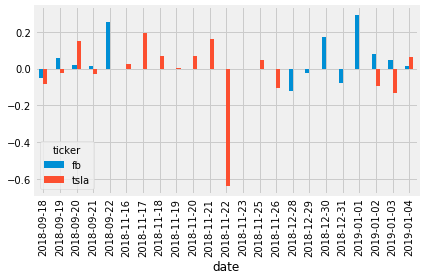

In [192]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

# Group by date and ticker columns from scored_news and calculate the mean
mean_c = scored_news.groupby(['date','ticker']).mean()
# Unstack the column ticker
mean_c = mean_c.unstack('ticker')
# Get the cross-section of compound in the 'columns' axis
mean_c = mean_c.xs('compound', axis='columns')
# Plot a bar chart with pandas
# ... YOUR CODE FOR TASK 6 ...
mean_c.plot.bar()

In [193]:
mean_c.sample(10)

ticker            fb      tsla
date                          
2018-11-21       NaN  0.162045
2019-01-01  0.291667       NaN
2018-12-29 -0.024933       NaN
2018-11-18       NaN  0.067433
2018-12-31 -0.076540       NaN
2018-11-20       NaN  0.066862
2018-09-20  0.018447  0.148757
2018-11-25       NaN  0.046725
2018-12-30  0.173817       NaN
2018-12-28 -0.120973       NaN

## 7. Weekends and duplicates
<p>What happened to Tesla on November 22nd? Since we happen to have the headlines inside our <code>DataFrame</code>, a quick peek reveals that there are a few problems with that particular day: </p>
<ul>
<li>There are only 5 headlines for that day.</li>
<li>Two headlines are verbatim the same as another but from another news outlet.</li>
</ul>
<p>Let's clean up the dataset a bit, but not too much! While some headlines are the same news piece from different sources, the fact that they are written differently could provide different perspectives on the same story. Plus, when one piece of news is more important, it tends to get more headlines from multiple sources. What we want to get rid of is verbatim copied headlines, as these are very likely coming from the same journalist and are just being "forwarded" around, so to speak.</p>

In [195]:
# Count the number of headlines in scored_news (store as integer)
num_news_before = scored_news.headline.count()
# Drop duplicates based on ticker and headline
scored_news_clean = scored_news.drop_duplicates(subset=['ticker','headline'])
# Count number of headlines after dropping duplicates
num_news_after = scored_news_clean.headline.count()
# Compare before and after
# ... YOUR CODE FOR TASK 7 ...
print(num_news_after-num_news_before )

-24


## 8. Sentiment on one single trading day and stock
<p>Just to understand the possibilities of this dataset and get a better feel of the data, let's focus on one trading day and one single stock. We will make an informative plot where we will see the smallest grain possible: headline and subscores.</p>

In [197]:
# Set the index to ticker and date
single_day = scored_news_clean.set_index(['ticker', 'date'])
# Cross-section the fb row
single_day = single_day.loc['fb']
# Select the 3rd of January of 2019
single_day = single_day.loc['2019-01-03']
# Convert the datetime string to just the time
single_day['time'] = pd.to_datetime(single_day['time'])
single_day['time'] = single_day.time.dt.time
# Set the index to time and sort by it
single_day = single_day.set_index('time').sort_index()

## 9. Visualize the single day
<p>We will make a plot to visualize the positive, negative and neutral scores for a single day of trading and a single stock. This is just one of the many ways to visualize this dataset.</p>

Text(0,0.5,'scores')

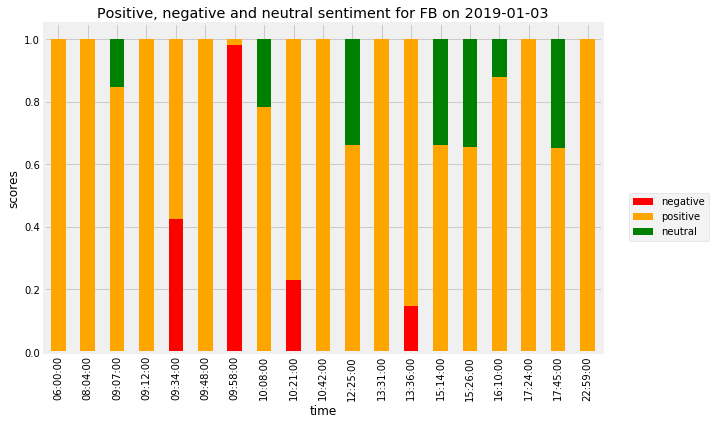

In [199]:
TITLE = "Positive, negative and neutral sentiment for FB on 2019-01-03"
COLORS = ["red", "orange", "green"]
# Drop the columns that aren't useful for the plot
plot_day = single_day.drop(['date','headline','compound'],axis=1)
# Change the column names to 'negative', 'positive', and 'neutral'
plot_day.columns = ['negative','positive','neutral']
# Plot a stacked bar chart
# ... YOUR CODE FOR TASK 9 :-) ...
plot_day.plot.bar(stacked = True,
                 figsize=(10,6),
                 title=TITLE,
                 color=COLORS)
plt.legend(bbox_to_anchor=(1.2,0.5))
plt.ylabel("scores")